In [1]:
from os.path import expanduser
import json
import datetime as dt
import pandas as pd
import pandas.io.sql as pd_sql
import matplotlib.pyplot as plt
from functions.formatting import title_to_snake_case
from functions.plotting import plot_empty

with open(expanduser('.db/postgres.json')) as f:
    cred = json.load(f)
    username = cred.get("user")
    password = cred.get("password")
    host = cred.get("host")
    port = cred.get("port")
    
# sqlalchemy connection arguments
db_name = "sf_rent_petitions"
connection_str = f'postgres://{username}:{password}@{host}:{port}/{db_name}' # sqlalchemy connection args

In [2]:
save=False

# Get Data

In [3]:
# Check
query = """
SELECT *
FROM petitions
;
"""
petition_df = pd_sql.read_sql(query, connection_str, parse_dates=['date']) # grab data as a dataframe
petition_df = petition_df.reset_index(drop=True)
petition_df.head()

,index,date,priority,appeal_id,filing_party,prop_i_petition,ground_landlord_capital_improvement,ground_landlord_comparable_rents,ground_landlord_extension_of_time_for_capital_improvements,ground_landlord_intent_to_withdraw_ellis,...,neighborhood_number,computed_region_fyvs_ahh9,computed_region_p5aj_wyqh,computed_region_rxqg_mtj9,computed_region_yftq_j783,computed_region_bh8s_q3mv,latitude,longitude,linked_petition_ids,num_petition_id
0,0,2019-03-29,No,None,tenant,None,False,False,False,False,...,2.0,2.0,7.0,5.0,2.0,28859.0,37.745261,-122.421229,"[""T190501""]",1
1,1,2019-03-29,No,None,landlord,None,True,False,False,False,...,9.0,10.0,9.0,11.0,7.0,28852.0,37.772274,-122.425349,"[""L190451"", ""L190450""]",2
2,2,2019-03-29,No,None,tenant,None,False,False,False,False,...,32.0,32.0,1.0,10.0,3.0,308.0,37.801896,-122.413271,"[""T190536""]",1
3,3,2019-03-29,No,None,landlord,None,False,False,False,False,...,35.0,35.0,8.0,3.0,1.0,29491.0,37.748352,-122.503939,"[""L190488""]",1
4,4,2019-03-29,No,None,tenant,None,False,False,False,False,...,9.0,10.0,9.0,11.0,7.0,28852.0,37.773615,-122.426540,"[""E190473""]",1


In [4]:
# Get neighborhood counts for analysis
neighborhood_counts_df = petition_df.groupby([pd.Grouper(key="date", freq="M"), "neighborhood_name"])[
    ["neighborhood_name"]
].count().unstack()['neighborhood_name']
neighborhood_counts_df

neighborhood_name,Bayview Hunters Point,Bernal Heights,Castro/Upper Market,Chinatown,Excelsior,Financial District/South Beach,Glen Park,Golden Gate Park,Haight Ashbury,Hayes Valley,...,Russian Hill,Seacliff,South of Market,Sunset/Parkside,Tenderloin,Treasure Island,Twin Peaks,Visitacion Valley,West of Twin Peaks,Western Addition
date,,,,,,,,,,,,,,,,,,,,,
1997-01-31,2.0,5.0,6.0,NaN,1.0,1.0,NaN,NaN,6.0,7.0,...,6.0,NaN,1.0,5.0,13.0,NaN,2.0,NaN,1.0,7.0
1997-02-28,2.0,5.0,8.0,NaN,3.0,NaN,1.0,NaN,3.0,8.0,...,7.0,NaN,2.0,3.0,8.0,NaN,NaN,2.0,3.0,2.0
1997-03-31,5.0,6.0,12.0,NaN,3.0,1.0,NaN,NaN,10.0,13.0,...,4.0,NaN,2.0,11.0,6.0,NaN,4.0,1.0,3.0,5.0
1997-04-30,3.0,3.0,10.0,2.0,2.0,1.0,2.0,NaN,6.0,3.0,...,3.0,NaN,2.0,7.0,14.0,NaN,4.0,NaN,4.0,1.0
1997-05-31,1.0,5.0,6.0,1.0,5.0,NaN,NaN,NaN,7.0,10.0,...,5.0,NaN,2.0,9.0,8.0,NaN,3.0,3.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-30,4.0,4.0,6.0,6.0,3.0,1.0,NaN,NaN,6.0,6.0,...,11.0,NaN,3.0,6.0,11.0,NaN,2.0,NaN,NaN,3.0
2018-12-31,3.0,1.0,4.0,2.0,2.0,1.0,NaN,NaN,2.0,6.0,...,3.0,NaN,1.0,6.0,13.0,NaN,1.0,3.0,2.0,6.0
2019-01-31,3.0,5.0,9.0,6.0,2.0,NaN,NaN,NaN,6.0,7.0,...,5.0,NaN,3.0,6.0,7.0,NaN,NaN,1.0,2.0,1.0


# Volume by Neighborhood

In [5]:
neighborhood_stats_df = neighborhood_counts_df.fillna(0).agg(['mean', 'std']).T.reset_index().rename(columns={'index': 'neighborhood_name'})

In [6]:
# Get mean count per month
mean_df = neighborhood_stats_df[(neighborhood_stats_df['mean'] > 1)].dropna()
mean_df['color'] = '#7f7f7f'
mean_df.loc[(mean_df['neighborhood_name'] == 'Mission'), ['color']] = '#ff7f0e'
mean_df = mean_df.sort_values('mean').reset_index(drop=True)

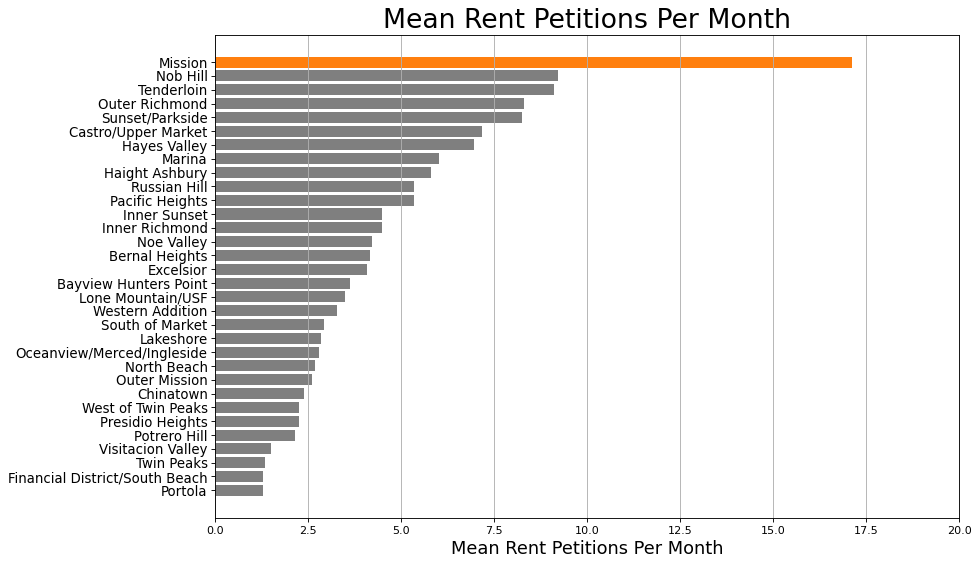

In [13]:
fig, ax = plot_empty(xlabel='Mean Rent Petitions Per Month', title='Mean Rent Petitions Per Month',
                     figsize=(12, 8))
ax.barh(mean_df['neighborhood_name'], mean_df['mean'], align='center', capsize=3, color = mean_df['color'])
ax.set_yticks(mean_df['neighborhood_name'])
ax.set_yticklabels(mean_df['neighborhood_name'], fontsize=12)
ax.set_xlim(left = 0, right = 20)
ax.xaxis.grid(True)
if save:
    plt.savefig('figures/eda/mean_per_month-by-neighborhood.png', transparent = True, bbox_inches = 'tight')
plt.show()
plt.close()

# Timeseries per Neighborhood

In [8]:
# lookup tool only
# neighborhood_df = petition_df[[
#     'neighborhood_number', 'neighborhood_name'
# ]].drop_duplicates().sort_values('neighborhood_number').reset_index(drop=True).copy()  # important
# neighborhood_df = neighborhood_df.drop(20) # remove 20: Potrero Hill

# neighborhood_num_to_name = dict(zip(neighborhood_df['neighborhood_number'].to_list(),
#                                     neighborhood_df['neighborhood_name'].to_list()))

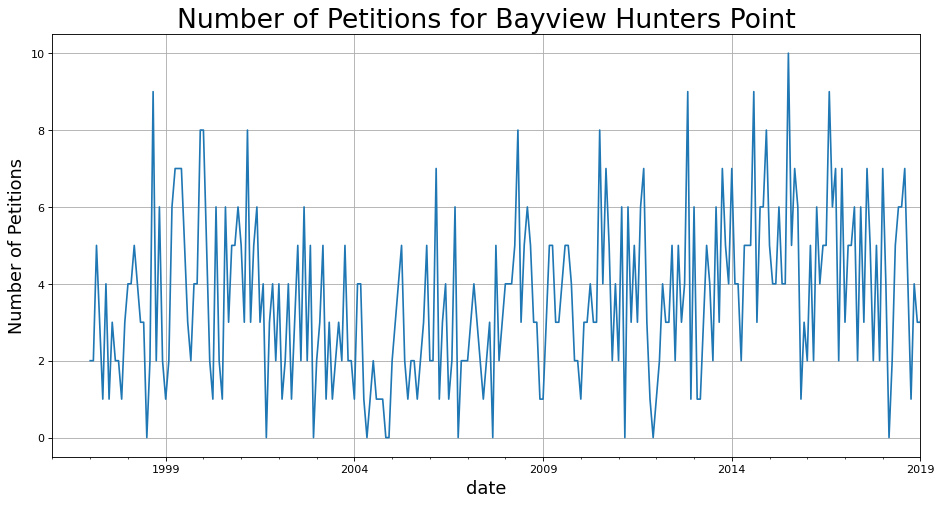

In [9]:
# Check distribution of data over time by neighborhood number

i=0
for neighborhood in neighborhood_counts_df.columns:
    
    # Plot
    fig, ax = plot_empty(xlabel='Date', ylabel='Number of Petitions',
                         title=f'Number of Petitions for {neighborhood}',
                         figsize=(14,7))
    neighborhood_counts_df[neighborhood].fillna(0).plot(kind="line", color='#1f77b4', legend=None)
    ax.set_xlim(dt.datetime(1996, 1, 1), dt.datetime(2019, 1, 1))
    ax.grid(True)
    
    # Save
    neighborhood_f = title_to_snake_case(neighborhood).replace('/', '_')
    if save:
        plt.savefig(f"figures/timeseries/petitions-for-{neighborhood_f}.png",
                    transparent=True, bbox_inches="tight")
        
    if i==0:
        plt.show()
        i+=1
    plt.close()  # save memory

# Correlation with Mission District

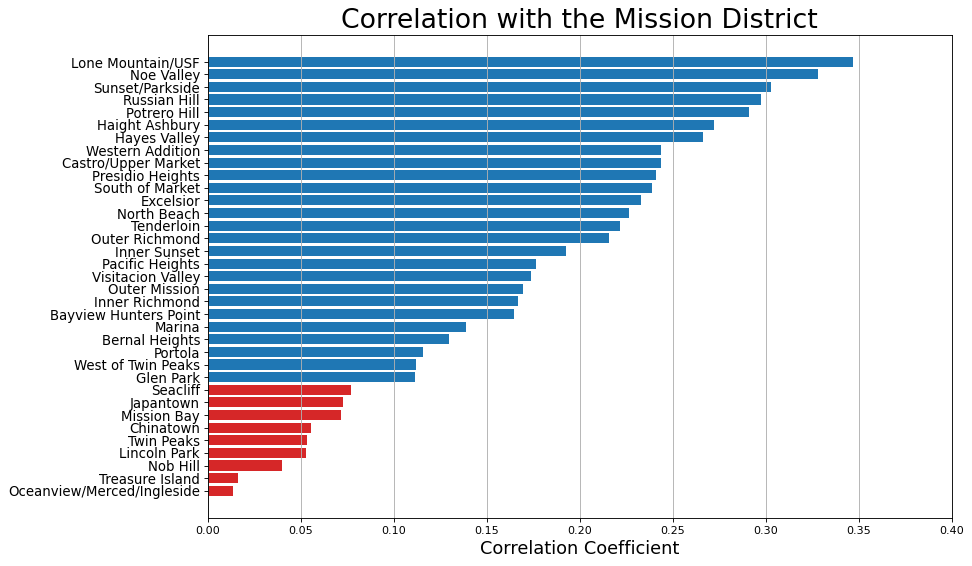

In [12]:
# Data
corr_df = pd.DataFrame(neighborhood_counts_df.fillna(0).corr()['Mission'].reset_index()).rename(columns={'Mission': 'corr'})
corr_df = corr_df[(corr_df['corr'] > 0) &
                  (corr_df['neighborhood_name'].isin(['Mission']) == False)].dropna()
corr_df['color'] = corr_df['corr'].apply(lambda x: '#1f77b4' if x >= 0.11 else '#d62728')
corr_df = corr_df.sort_values('corr').reset_index(drop=True)


# Plot
fig, ax = plot_empty(xlabel='Correlation Coefficient', title='Correlation with the Mission District',
                     figsize=(12, 8))
ax.barh(corr_df['neighborhood_name'], corr_df['corr'], align='center', capsize=3, color = corr_df['color'])
ax.set_yticks(corr_df['neighborhood_name'])
ax.set_yticklabels(corr_df['neighborhood_name'], fontsize=12)
ax.set_xlim(left = 0, right = 0.4)
ax.xaxis.grid(True)
if save:
    plt.savefig('figures/eda/correlation-with-mission.png', transparent = True, bbox_inches = 'tight')
plt.show()
plt.close()

# Separate Stationary Neighborhoods

In [11]:
# Get standard deviation of counts per neighborhood
# See neighborhood_stats_df above
stationary_neighborhoods = neighborhood_stats_df[(neighborhood_stats_df['std'] <= 2.07)]['neighborhood_name'].to_list()
non_stationary_neighborhoods = neighborhood_stats_df[(neighborhood_stats_df['std'] > 2.07)]['neighborhood_name'].to_list()

In [12]:
# Found via manually inspection
actually_stationary_list = ['Lakeshore', 'Nob Hill']
actually_non_stationary_list = ['North Beach', 'Outer Mission', 'Presidio Heights', 'Western Addition']

# Store in functions.data
stationary_neighborhoods = [item for item in stationary_neighborhoods if item not in 
    actually_non_stationary_list]+actually_stationary_list
non_stationary_neighborhoods = [item for item in non_stationary_neighborhoods if item not in 
    actually_stationary_list]+actually_non_stationary_list

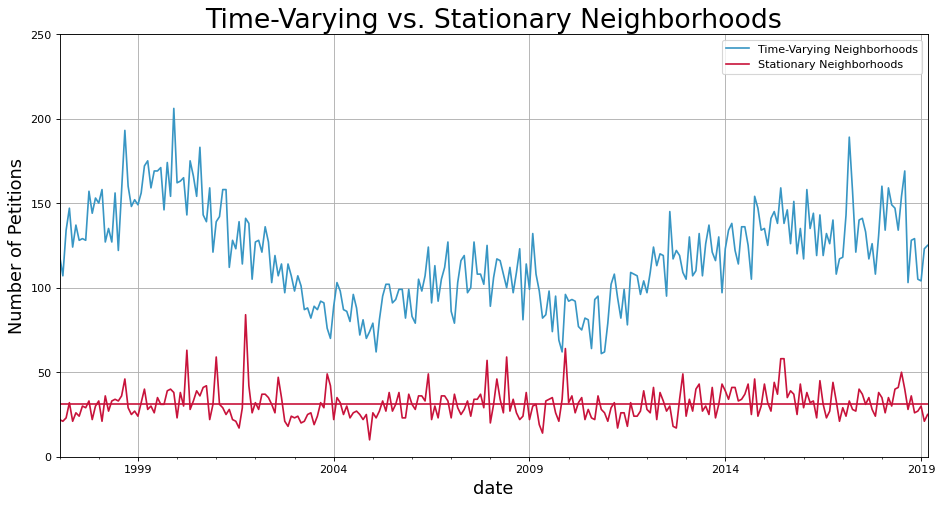

In [13]:
petition_month_count_clean_ser = neighborhood_counts_df[non_stationary_neighborhoods].sum(axis=1)

# Combined Distributions
fig, ax = plot_empty(xlabel='Date', ylabel='Number of Petitions', title='Time-Varying vs. Stationary Neighborhoods',
                     figsize=(14, 7))
petition_month_count_clean_ser.plot(kind="line", color='#3896c4', label = 'Time-Varying Neighborhoods')
neighborhood_counts_df[stationary_neighborhoods].sum(axis=1).plot(kind="line", label = 'Stationary Neighborhoods', color = '#c8133b')
plt.hlines(y=neighborhood_counts_df[stationary_neighborhoods].sum(axis=1).mean(),
           xmin=min(petition_month_count_clean_ser.index),
           xmax=max(petition_month_count_clean_ser.index), color = '#c8133b')
plt.ylim(0, 250)
plt.legend(loc = 'upper right')
ax.grid(True)
if save:
    plt.savefig("figures/eda/stationary-vs-non_stationary.png", transparent=True, bbox_inches="tight")
plt.show()
plt.close()